# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [80]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [81]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [82]:
df = pd.read_csv('/content/drive/MyDrive/Datacademy_Notebooks/studentsperformance.csv')


In [83]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
df.shape

(1000, 8)

In [85]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [86]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

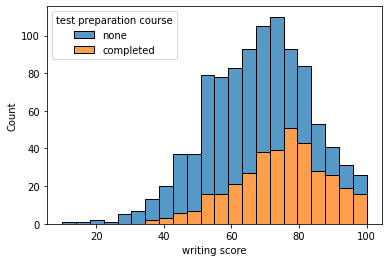

In [87]:
sns.histplot(data=df, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

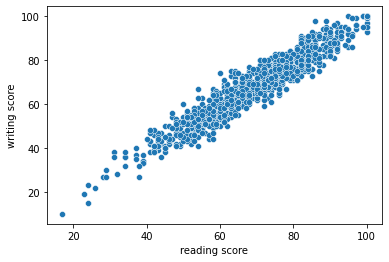

In [88]:
sns.scatterplot(data=df, x='reading score', y='writing score')

### Creando una tabla de frecuencias

In [89]:
freq = df['writing score'].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={'index':'writing scores', 'writing score':'number of students'})
df_freq

,writing scores,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [90]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [91]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [92]:
X = df['reading score'].values
Y = df['writing score'].values

X = X.reshape(-1,1)

#dividir los datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [93]:
#regresion lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

print('La pendiente es: ', reg.coef_)
print('El bias es: ', reg.intercept_)
print('Coeficiente de determinacion: ', reg.score(X_train, Y_train))

La pendiente es:  [0.99531163]
El bias es:  -0.7703189845189229
Coeficiente de determinacion:  0.9115665909143101


## Visualización de nuestro modelo entrenado

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


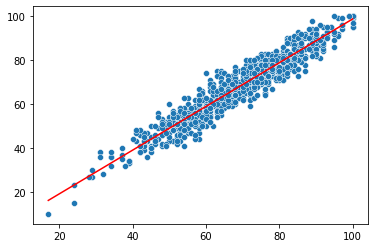

In [94]:
x_flat = X_train.flatten()

y_hat = reg.predict(X_train)

sns.scatterplot(x=x_flat, y=Y_train)
sns.lineplot(x_flat, y_hat, color='r')

## Evaluación de nuestro modelo

In [95]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)

#calculo el error caudratico medio
print(mean_squared_error(Y_test, y_pred))

19.56480961643477


In [96]:
value = pd.DataFrame({'Actual test': Y_test.flatten(), 'predict':y_pred.flatten()})
value

,Actual test,predict
0,93,98.760844
1,72,64.920249
2,84,79.849923
3,71,79.849923
4,66,62.929626
...,...,...
195,65,69.896807
196,75,72.882742
197,76,74.873365
198,81,82.835858
